Chapter 33
# K均值聚类
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [2]:
# 导入并整理数据
iris = datasets.load_iris()
X = iris.data[:, :2]

In [3]:
# 生成网格化数据
x1_array = np.linspace(4,8,101)
x2_array = np.linspace(1,5,101)
xx1, xx2 = np.meshgrid(x1_array,x2_array)
# 创建色谱
rgb = [[255, 238, 255], [219, 238, 244], [228, 228, 228]]
rgb = np.array(rgb)/255.
cmap_light = ListedColormap(rgb)

In [4]:
# 采用KMeans聚类
kmeans = KMeans(n_clusters=3, n_init='auto')
cluster_labels = kmeans.fit_predict(X)

In [7]:
# 预测聚类
Z = kmeans.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

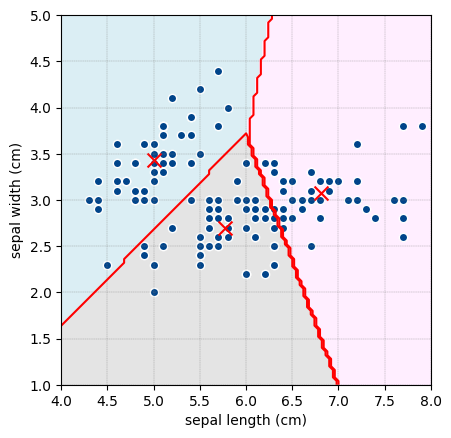

In [16]:
fig, ax = plt.subplots()
# 绘制分类区域
ax.contourf(xx1, xx2, Z, cmap=cmap_light)
ax.scatter(x=X[:, 0], y=X[:, 1], color=np.array([0, 68, 138])/255., alpha=1.0, linewidth = 1, edgecolor=[1,1,1])
# 绘制决策边界
levels = np.unique(Z).tolist()
ax.contour(xx1, xx2, Z, levels=levels,colors='r')
# 质心
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=100, linewidths=1.5, color="r")

ax.set_xlim(4, 8); ax.set_ylim(1, 5)
ax.set_xlabel(iris.feature_names[0]); ax.set_ylabel(iris.feature_names[1])
ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
ax.set_aspect('equal', adjustable='box')